# Statistics Assignment-2 (CIs & Hypothesis)

## CONFIDENCE INTERVALS

**EXERCISE 1.** What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees. 

Give a 99% confidence interval for the average body temperature of healthy people.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from math import sqrt

In [2]:
mu = 96.8  # population mean
n = 130  # sample size
x_bar = 96.25  # sample mean
s = 0.73  # standard deviation of the sample
con_level = 0.99  # confidence interval level

se = s / sqrt(n)  # standart error
degrees_of_freedom = n-1 

t_int= stats.t.interval(con_level, df=degrees_of_freedom, loc=x_bar, scale = se)

print(stats.t.ppf(q=0.99,df=129))

print("99% Confidence Interval:")
print("Lower Bound:", t_int[0])
print("Upper Bound:", t_int[1])


2.3556022904503915
99% Confidence Interval:
Lower Bound: 96.08260738705933
Upper Bound: 96.41739261294067


In [3]:
t_int

(96.08260738705933, 96.41739261294067)

**EXERCISE 2.** The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.


Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.

In [4]:
n = 500  # sample size
x_bar = 5.4  # sample mean
s = 3.1  # standard deviation of the sample

se = s / sqrt(n)  # standart error

stats.t.interval(0.95, df=500-1, loc=x_bar, scale=se)

(5.127617354510309, 5.672382645489692)

## HYPOTHESIS TESTING

**EXERCISE 3.** The hourly wages in a particular industry are normally distributed with mean \\$13.20 and standard deviation \\$2.50. A company in this industry employs 40 workers, paying them an average of \\$12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [5]:
mu = 13.20  # population average
sigma = 2.50  # sd of the population
x_bar = 12.20 # sample mean
n = 40 # number of workers
alpha = 0.01

In [6]:
se = sigma / sqrt(n)  # standart error
se

0.3952847075210474

In [7]:
z = (x_bar - mu) / se
z

-2.5298221281347035

In [8]:
p_value = stats.norm.cdf(z)
p_value

0.005706018193000824

In [9]:
if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


**EXERCISE 4.** Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [10]:
soil = pd.read_csv('soil.csv')
soil.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [11]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Soil1   30 non-null     float64
 1   Soil2   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [12]:
soil.isnull().sum()

Soil1    5
Soil2    0
dtype: int64

In [13]:
soil.dropna(inplace=True)

In [14]:
stat, p = stats.levene(soil.Soil1, soil.Soil2)

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.01
if p > alpha:
	print('The population variances of group 1 and 2 are equal.')
else:
	print('The population variances of group 1 and 2 are not equal.')

Statistics=0.232, p=0.632
The population variances of group 1 and 2 are equal.


In [15]:
TtestResult = stats.ttest_ind(soil.Soil1, soil.Soil2, equal_var = True)
TtestResult

TtestResult(statistic=5.134893443609086, pvalue=3.4402046436336477e-06, df=58.0)

In [16]:
#Reject Ho. The two population means are not equal
TtestResult.pvalue<alpha

True

**EXERCISE 5.** The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

* Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
* Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [17]:
pisa = pd.read_csv('2015 PISA Test.csv')
pisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [18]:
pisa.shape

(70, 6)

In [19]:
pisa = pisa.dropna()

In [20]:
pisa.shape

(65, 6)

In [21]:
pisa.describe()

,internet_users_per_100,Math,Reading,Science
count,65.000000,65.000000,65.000000,65.000000
mean,72.364354,463.796218,462.118551,467.535888
std,16.570118,51.293822,48.443166,45.762751
min,21.976068,359.606200,346.549000,375.745100
25%,63.306625,417.991900,427.141000,427.997800
50%,73.098700,478.644800,481.439100,475.408900
75%,85.052900,501.729800,499.814600,502.575100
max,98.200000,564.189700,535.100200,555.574700


In [22]:
pisa.groupby('Continent_Code').describe().T

Continent_Code                        AF          AS          EU          OC  \
internet_users_per_100 count    2.000000   17.000000   37.000000    2.000000   
                       mean    43.359918   68.455613   77.274888   86.391704   
                       std      7.297226   21.086060   12.425773    2.589686   
                       min     38.200000   21.976068   53.744979   84.560519   
                       25%     40.779959   50.300000   68.632900   85.476112   
                       50%     43.359918   74.000000   76.184000   86.391704   
                       75%     45.939877   84.948353   87.479056   87.307296   
                       max     48.519836   92.884826   98.200000   88.222889   
Math                   count    2.000000   17.000000   37.000000    2.000000   
                       mean   363.212100  466.216647  477.981449  494.559750   
                       std      5.099513   64.356490   35.150403    0.938401   
                       min    359.606200  380.259000  371.311400  493.896200   
                       25%    361.409150  403.833200  464.040100  494.227975   
                       50%    363.212100  459.816000  489.728700  494.559750   
                       75%    365.015050  531.296100  503.722000  494.891525   
                       max    366.818000  564.189700  521.250600  495.223300   
Reading                count    2.000000   17.000000   37.000000    2.000000   
                       mean   355.457400  454.059682  476.164608  506.085650   
                       std      7.916909   57.048962   37.720545    4.504341   
                       min    349.859300  346.549000  351.741500  502.900600   
                       25%    352.658350  408.102200  452.514300  504.493125   
                       50%    355.457400  433.542300  487.250100  506.085650   
                       75%    358.256450  508.690500  499.814600  507.678175   
                       max    361.055500  535.100200  526.424700  509.270700   
Science                count    2.000000   17.000000   37.000000    2.000000   
                       mean   381.074250  467.945847  478.299381  511.648700   
                       std      7.536556   56.671371   34.450616    2.340241   
                       min    375.745100  386.485400  383.682400  509.993900   
                       25%    378.409675  417.611200  460.774900  510.821300   
                       50%    381.074250  456.483600  490.225000  511.648700   
                       75%    383.738825  523.277400  501.936900  512.476100   
                       max    386.403400  555.574700  534.193700  513.303500   

Continent_Code                        SA  
internet_users_per_100 count    7.000000  
                       mean    60.180494  
                       std      9.772455  
                       min     40.900000  
                       25%     57.116462  
                       50%     64.289000  
                       75%     66.321532  
                       max     69.198471  
Math                   count    7.000000  
                       mean   402.887700  
                       std     18.128894  
                       min    377.069500  
                       25%    388.102200  
                       50%    409.033300  
                       75%    417.617650  
                       max    422.671400  
Reading                count    7.000000  
                       mean   425.359229  
                       std     19.709688  
                       min    397.541400  
                       25%    416.126900  
                       50%    425.303100  
                       75%    431.922700  
                       max    458.570900  
Science                count    7.000000  
                       mean   421.747186  
                       std     18.470319  
                       min    396.683600  
                       25%    408.205450  
                       50%    424.590500  
                       75%

In [23]:
as_math = pisa.groupby('Continent_Code').describe().T.loc['Math','AS']
eu_math = pisa.groupby('Continent_Code').describe().T.loc['Math','EU']

In [24]:
eu_math

count     37.000000
mean     477.981449
std       35.150403
min      371.311400
25%      464.040100
50%      489.728700
75%      503.722000
max      521.250600
Name: EU, dtype: float64

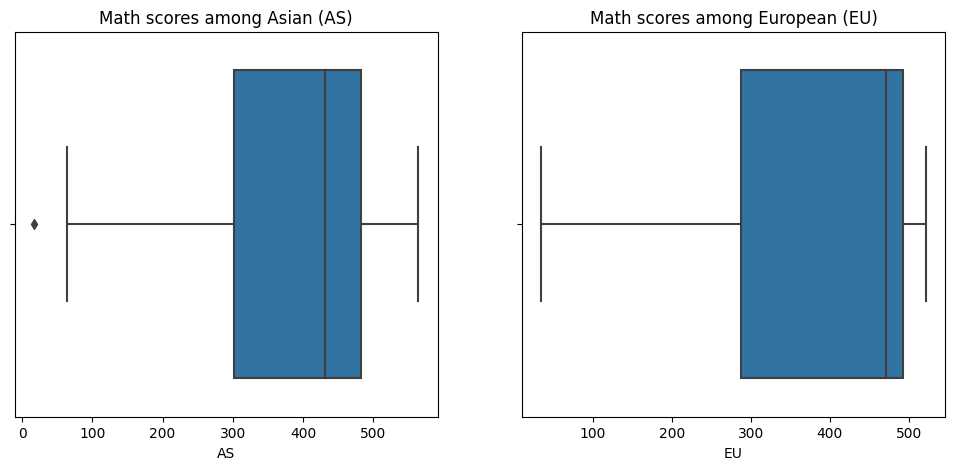

In [25]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(x=as_math, ax=ax[0])
ax[0].set_title('Math scores among Asian (AS)')
sns.boxplot(x=eu_math, ax=ax[1]);
ax[1].set_title('Math scores among European (EU)');

In [26]:
# H0 =  there is no difference (on the average) for the math scores among European (EU) and Asian (AS) countries
# H1 =  there is  difference (on the average) for the math scores among European (EU) and Asian (AS) countries

In [27]:
stat, p = stats.levene(as_math, eu_math)

print('Statistics=%f, p=%f' % (stat, p))
# interpret
alpha = 0.01
if p > alpha:
	print('The population variances of group 1 and 2 are equal.')
else:
	print('The population variances of group 1 and 2 are not equal.')

Statistics=0.010520, p=0.919763
The population variances of group 1 and 2 are equal.


In [28]:
TtestResult = stats.ttest_ind(as_math, eu_math, equal_var = True)
TtestResult

TtestResult(statistic=-0.015990669524584916, pvalue=0.9874674866535558, df=14.0)

In [29]:
#Fail to reject Ho. The two population means are equal
TtestResult.pvalue<alpha

False